In [1]:
import pandas as pd
import csv
import os
import json
import numpy as np
from citipy import citipy
import requests
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"C:\Users\Yanwho\OneDrive\Documents\python-api-challenge")

In [3]:
from config import api_key

In [4]:
# create list of random latitudes evenly distributed across globe

lat = np.random.uniform(low=-90.000, high=90.000, size=2000)

In [5]:
# create list of random longitudes evenly distributed across globe

long = np.random.uniform(low=-180.000, high=180.000, size=2000)

In [6]:
# combine lat and long

latlong = zip(lat, long)

In [7]:
# create list of latitude and longitude combinations 

coordinates=list(latlong)

In [8]:
# create empty lists to be populated in loops

cities=[]

city_name=[]
city_id=[]
latitude=[]
longitude=[]
max_temp=[]
humidity=[]
wind_speed=[]
cloudiness=[]

In [9]:
# populate cities list

for x in coordinates:
    city = citipy.nearest_city(x[0],x[1]).city_name
    if city not in cities:
        cities.append(city)
  

In [10]:
# create vairable for base url to be used when making api calls

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
# city = []



In [11]:
# loop through city names and create unique api calls for each city
# populate lists for desired fields from returned json
# skip cities that so not result in a successful api call

for city in cities:

    query_url = url + "&appid=" + api_key + "&q=" + city
    weather_response = requests.get(query_url).json()

    try:
        city_name.append(weather_response["name"])
        city_id.append(weather_response["id"])
        latitude.append(weather_response["coord"]["lat"])
        longitude.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        wind_speed.append(weather_response["wind"]["speed"])
        cloudiness.append(weather_response["clouds"]["all"])
        print(city, "success")
    except:
        print(city, "CITY NOT FOUND!")
    pass


nichinan success
georgetown success
atuona success
mys shmidta CITY NOT FOUND!
de land success
dikson success
bababe CITY NOT FOUND!
andenes success
port elizabeth success
hobart success
san patricio success
tuktoyaktuk success
mataura success
rio rancho success
meulaboh success
rikitea success
mahebourg success
puerto ayora success
mount gambier success
baracoa success
kruisfontein success
pevek success
thompson success
tuatapere success
kapaa success
lagoa success
salalah success
praia da vitoria success
marabba success
yellowknife success
hermanus success
vaini success
nome success
ust-kulom success
albany success
new norfolk success
kodiak success
cayenne success
qaanaaq success
taolanaro CITY NOT FOUND!
nikolskoye success
paamiut success
nanortalik success
ust-nera success
ponta delgada success
dingle success
belaya gora success
kuytun success
barawe CITY NOT FOUND!
lewisporte success
akdepe success
avarua success
ajdabiya success
aklavik success
fortuna success
bengkulu success
t

In [12]:
# create pandas dataframe from lists populated by series of api calls

results_df=pd.DataFrame({"City":pd.Series(city_name), 
                         "ID":pd.Series(city_id),
                         "Latitude":pd.Series(latitude), 
                         "Longitude":pd.Series(longitude), 
                         "Max Temp":pd.Series(max_temp), 
                         "Humidity":pd.Series(humidity), 
                         "Wind Speed":pd.Series(wind_speed),
                         "Cloudiness":pd.Series(cloudiness)
                        })

results_df

,City,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness
0,Nichinan,1855476,31.6000,131.3667,42.80,75,5.75,20
1,George Town,1735106,5.4112,100.3354,78.01,83,7.31,20
2,Atuona,4020109,-9.8000,-139.0333,77.95,78,15.59,35
3,DeLand,4152890,29.0283,-81.3031,59.00,82,5.75,90
4,Dikson,1507390,73.5069,80.5464,-13.23,90,8.23,4
...,...,...,...,...,...,...,...,...
692,Shubarkuduk,608271,49.1447,56.4872,-5.80,87,4.83,0
693,Orlik,1496073,52.5178,99.8250,-20.38,74,1.66,100
694,Barbosa Ferraz,3470837,-24.0300,-52.0117,75.20,88,6.91,90
695,Hare Bay,5970873,48.8499,-54.0148,24.80,86,1.14,100


In [19]:
# export dataframe to a csv file

results_df.to_csv("results.csv")

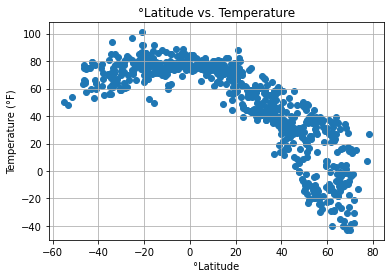

In [14]:
plt.scatter(results_df["Latitude"], results_df["Max Temp"])
plt.title("°Latitude vs. Temperature")
plt.ylabel("Temperature (°F)")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/max_temp.png")

<h1> °Latitude vs. Temperature <h1>
<h3>Not surprisingly, the highest temeratures are nearest the equator.  Since nearly 70% of the planets land is in the northern hemisphere, it makes sense that there are significantly fewer data points in the southern hemisphere.  The seasonal tilt of the Earths axis likely is the cause for relatively higher temps in the south compared to the north.<h3>

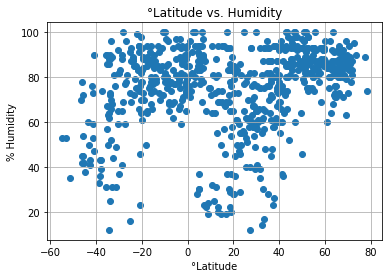

In [15]:
plt.scatter(results_df["Latitude"], results_df["Humidity"])
plt.title("°Latitude vs. Humidity")
plt.ylabel("% Humidity")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/humidity.png")

<h1> °Latitude vs. Humidity <h1>
<h3>Beyond a slight concentration of zero humidity locations, there appears to be little correlation between latitude and humidity levels.<h3>

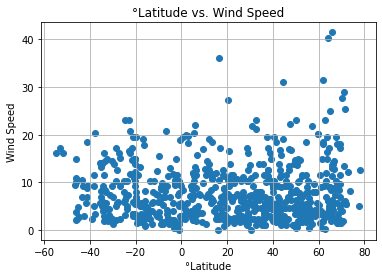

In [16]:
plt.scatter(results_df["Latitude"], results_df["Wind Speed"])
plt.title("°Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/wind_speed.png")

<h1> °Latitude vs. Wind Speed <h1>
<h3>Althought the extreme northern latitudes do indicate an increased possibility of some of the higher wind speeds, most of the data indicates little correlation. It is important to note that we lack data points from the extreme southern latitudes that may better bring this significance into focus<h3>

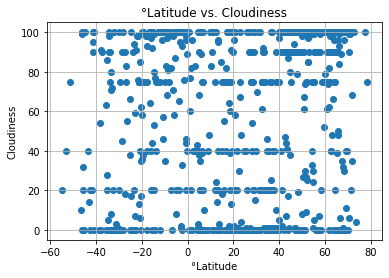

In [17]:
plt.scatter(results_df["Latitude"], results_df["Cloudiness"])
plt.title("°Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/cloudiness.png")

<h1> °Latitude vs. Cloudiness <h1>
<h3>There appears to be no significant direct correlation between latitude and cloudiness.s<h3>

In [23]:
# create dataframe of cities in the northern hemisphere

north_hem = results_df.Latitude >= 0
north_df = results_df[north_hem]
north_df

,City,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness
0,Nichinan,1855476,31.6000,131.3667,42.80,75,5.75,20
1,George Town,1735106,5.4112,100.3354,78.01,83,7.31,20
3,DeLand,4152890,29.0283,-81.3031,59.00,82,5.75,90
4,Dikson,1507390,73.5069,80.5464,-13.23,90,8.23,4
5,Andenes,3163146,69.3143,16.1194,28.00,63,6.91,11
...,...,...,...,...,...,...,...,...
686,Nouakchott,2377450,18.0858,-15.9785,68.00,30,11.50,2
687,Ust-Tsilma,477940,65.4410,52.1498,-14.24,87,1.92,39
692,Shubarkuduk,608271,49.1447,56.4872,-5.80,87,4.83,0
693,Orlik,1496073,52.5178,99.8250,-20.38,74,1.66,100


In [25]:
# create dataframe of cities in the southern hemisphere

south_hem = results_df.Latitude < 0
south_df = results_df[south_hem]
south_df

,City,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness
2,Atuona,4020109,-9.8000,-139.0333,77.95,78,15.59,35
6,Port Elizabeth,964420,-33.9180,25.5701,69.80,88,5.75,90
7,Hobart,2163355,-42.8794,147.3294,79.00,43,9.22,20
10,Mataura,6201424,-46.1927,168.8643,77.00,45,3.76,100
13,Rikitea,4030556,-23.1203,-134.9692,78.03,79,16.51,7
...,...,...,...,...,...,...,...,...
689,São Joaquim,3448828,-28.2939,-49.9317,60.46,100,5.75,100
690,Namatanai,2090021,-3.6667,152.4333,85.19,66,11.72,65
691,Pimentel,3693584,-6.8367,-79.9342,73.40,68,20.71,0
694,Barbosa Ferraz,3470837,-24.0300,-52.0117,75.20,88,6.91,90
